<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-07-28 00:51:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.6’

m4_survey_data.sqli 100%[===================>]  34.98M  41.0MB/s    in 0.9s    

2024-07-28 00:51:26 (41.0 MB/s) - ‘m4_survey_data.sqlite.6’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
mlp.style.use('ggplot')

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [9]:
QUERY="""
SELECT ConvertedComp FROM
master
"""
comp = pd.read_sql_query(QUERY, conn)
comp.head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


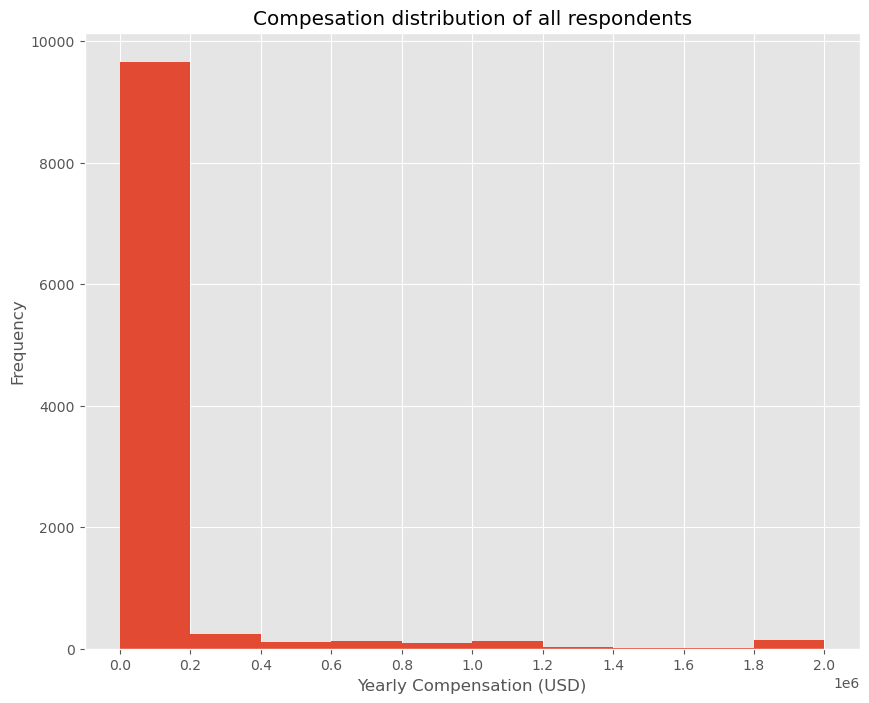

In [10]:
# your code goes here
bin_edges = np.linspace(comp.min(), comp.max(), 11)
comp.plot(kind='hist', figsize=(10,8), bins= 10, xticks=bin_edges)
plt.title('Compesation distribution of all respondents')
plt.xlabel('Yearly Compensation (USD)')
plt.legend().set_visible(False)
plt.show()

### Box Plots


Plot a box plot of `Age.`


In [11]:
QUERY="""
SELECT Age FROM
master
"""
age_t = pd.read_sql_query(QUERY, conn)
age_t.head()

,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0


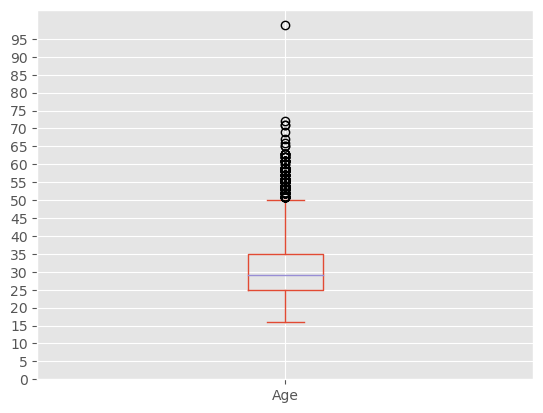

In [12]:
# your code goes here
age_t.plot(kind='box')
plt.yticks(np.arange(0,100,5))
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [13]:
QUERY="""
SELECT Age, WorkWeekHrs FROM
master
"""

scatt_plot = pd.read_sql_query(QUERY, conn)
scatt_plot.WorkWeekHrs.max()

1012.0

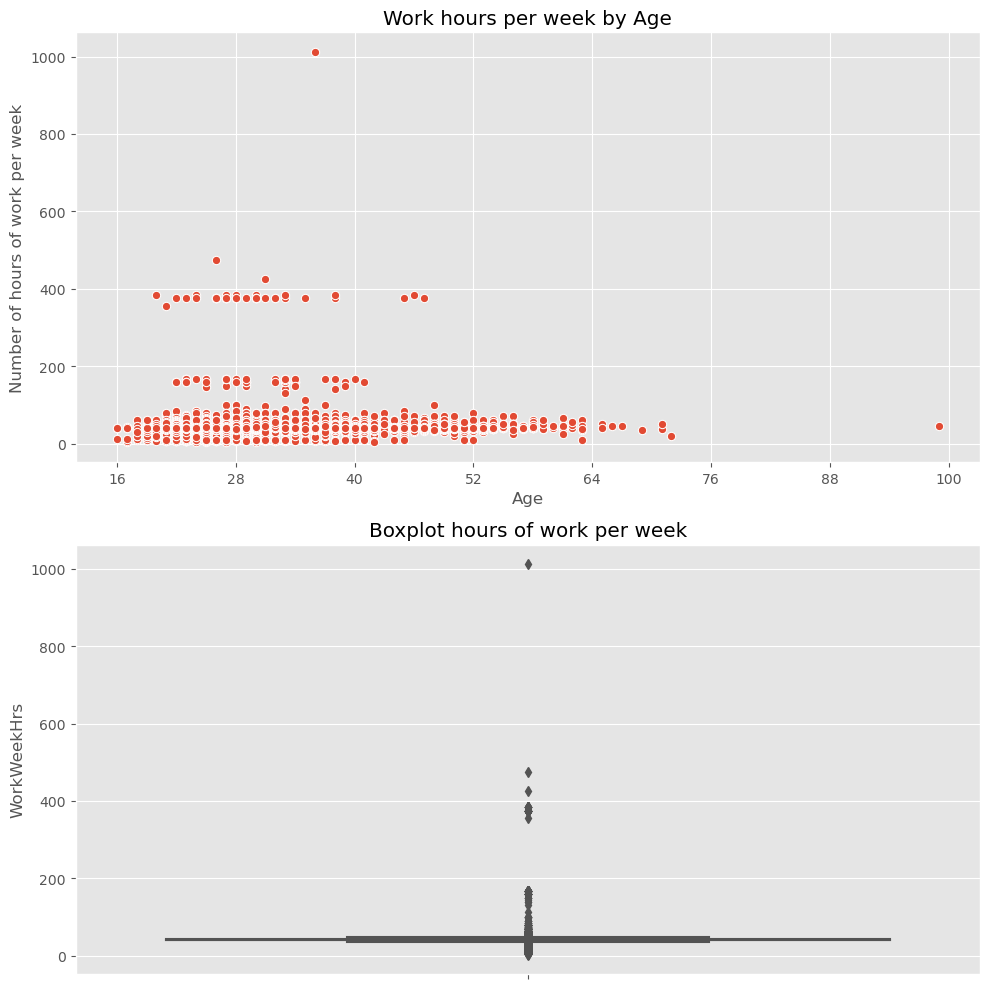

In [14]:
# your code goes here
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))
sns.scatterplot(data=scatt_plot, x='Age', y='WorkWeekHrs', ax=ax1)
ax1.set_xticks(np.linspace(16, 100, 8))
ax1.set_title('Work hours per week by Age')
ax1.set_ylabel('Number of hours of work per week')

sns.boxplot(y=scatt_plot['WorkWeekHrs'], ax=ax2)
ax2.set_title('Boxplot hours of work per week')
plt.tight_layout()
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [15]:
QUERY="""
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master """

bubble_plot = pd.read_sql_query(QUERY, conn)

In [16]:
median_code_rev = bubble_plot['CodeRevHrs'].median()
bubble_plot['CodeRevHrs'].replace(np.nan, median_code_rev, inplace=True)
bubble_plot['CodeRevHrs'].isnull().value_counts()

False    11398
Name: CodeRevHrs, dtype: int64

In [17]:
norm_code_rev = (bubble_plot['CodeRevHrs'] - bubble_plot['CodeRevHrs'].min()) / (bubble_plot['CodeRevHrs'].max() - bubble_plot['CodeRevHrs'].min())
norm_code_rev.head()

0    0.040404
1    0.121212
2    0.050505
3    0.040404
4    0.050505
Name: CodeRevHrs, dtype: float64

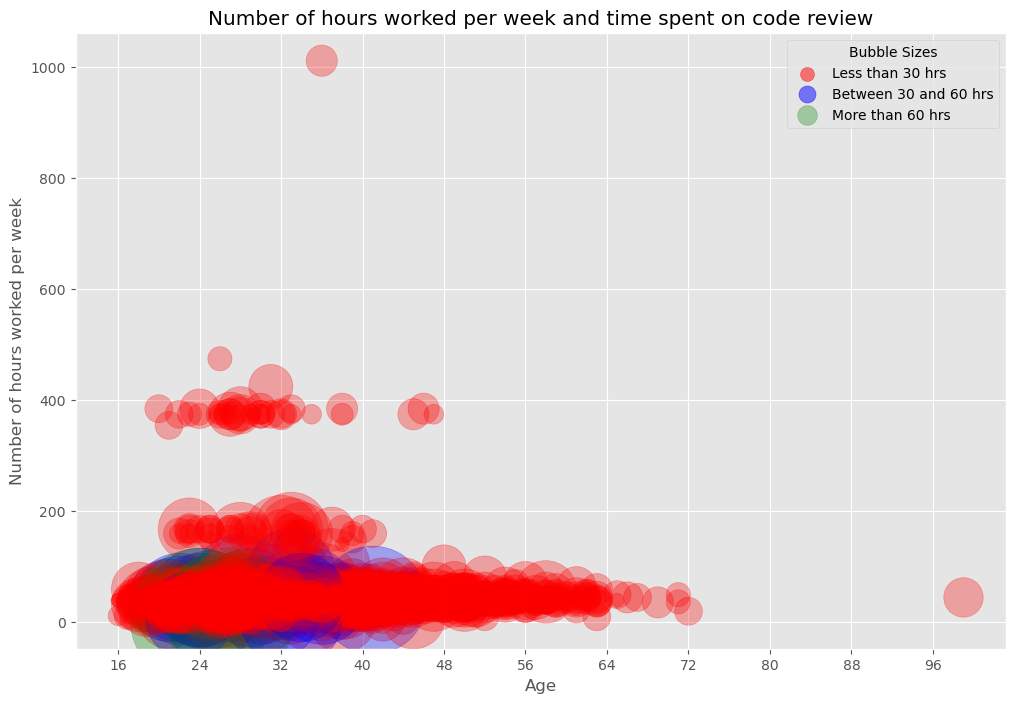

In [18]:
##### your code goes here
colors=[]
for rev in norm_code_rev:
    if rev <= 1/3:
        colors.append('red')
    elif rev <= 2/3:
        colors.append('blue')
    else:
        colors.append('green')
#plot
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter( x=bubble_plot['Age'], y=bubble_plot['WorkWeekHrs'], alpha=0.3, color=colors, s=norm_code_rev*10000)
ax.set_xticks(np.arange(16, 100, 8))
legend_labels=['Less than 30 hrs', 'Between 30 and 60 hrs', 'More than 60 hrs']
size_bins= np.linspace(100, 200, 3)
handles = [
    plt.scatter([], [], s=size_bins[0], color='r', alpha=0.5),
    plt.scatter([], [], s=size_bins[1], color='b', alpha=0.5),
    plt.scatter([], [], s=size_bins[2], color='g', alpha=0.3)
]

ax.set_title('Number of hours worked per week and time spent on code review')
ax.set_xlabel('Age')
ax.set_ylabel('Number of hours worked per week')
ax.legend(handles, legend_labels, title='Bubble Sizes')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [22]:
QUERY="""
SELECT DatabaseDesireNextYear, COUNT(*) AS NumberOfRespondants FROM
DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY COUNT(*) DESC
LIMIT 5
"""

pie_db5 = pd.read_sql_query(QUERY, conn)
pie_db5

,DatabaseDesireNextYear,NumberOfRespondants
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


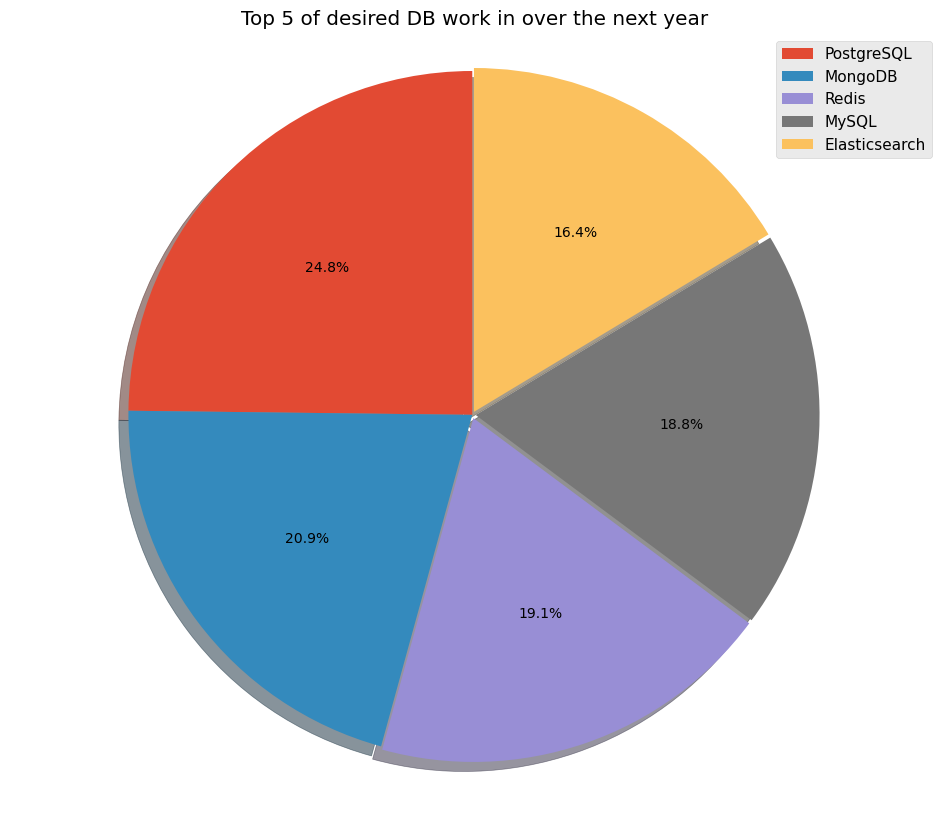

In [23]:
# your code goes here
#plot
labels=pie_db5['DatabaseDesireNextYear']
db_top5=pie_db5['NumberOfRespondants']
db_top5.plot(kind='pie', figsize=(12,10), autopct='%1.1f%%', startangle=90, labels=None, explode=[0,0,0.01,0.01,0.01], shadow=True)
plt.title('Top 5 of desired DB work in over the next year')
plt.axis('equal')
plt.ylabel('')
plt.legend(labels=labels, fontsize=11)
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [25]:
QUERY="""
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
ORDER BY Age"""

stacked_q = pd.read_sql_query(QUERY, conn)
stacked_q.head()

,Age,WorkWeekHrs,CodeRevHrs
0,30.0,40.0,5.0
1,30.0,50.0,4.0
2,30.0,45.0,8.0
3,30.0,40.0,4.0
4,30.0,40.0,5.0


In [26]:

stacked_chart = stacked_q.groupby('Age', as_index=False)[['WorkWeekHrs','CodeRevHrs']].median()
stacked_chart

,Age,WorkWeekHrs,CodeRevHrs
0,30.0,40.0,4.0
1,31.0,40.0,4.0
2,32.0,40.0,4.0
3,33.0,40.0,4.0
4,34.0,40.0,4.0
5,35.0,40.0,4.0


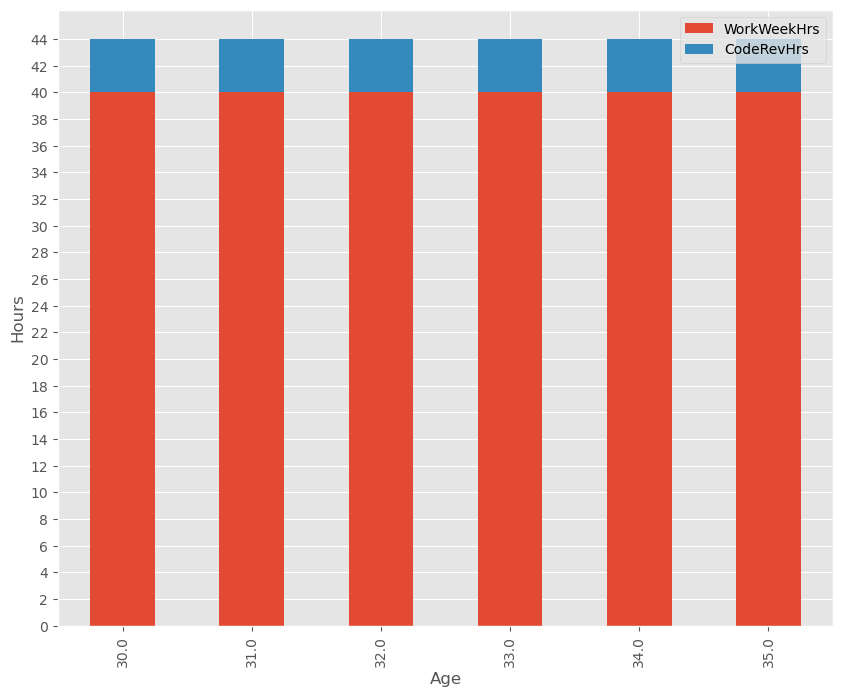

In [27]:
# your code goes here
stacked_chart.plot(kind='bar', x='Age', figsize=(10,8), stacked=True)
plt.ylabel('Hours')
plt.yticks(np.arange(0,45,2))
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [28]:
QUERY="""
SELECT Age, ConvertedComp
FROM master 
WHERE Age BETWEEN 45 AND 60
ORDER BY Age
"""

line_query = pd.read_sql_query(QUERY, conn)

In [29]:
line_plot = line_query.groupby('Age', as_index=False)['ConvertedComp'].median()
line_plot

,Age,ConvertedComp
0,45.0,90330.0
1,46.0,91593.0
2,47.0,91606.0
3,48.0,105750.0
4,49.0,85248.0
5,50.0,95000.0
6,51.0,100000.0
7,52.0,105500.0
8,53.0,100463.0
9,54.0,121000.0


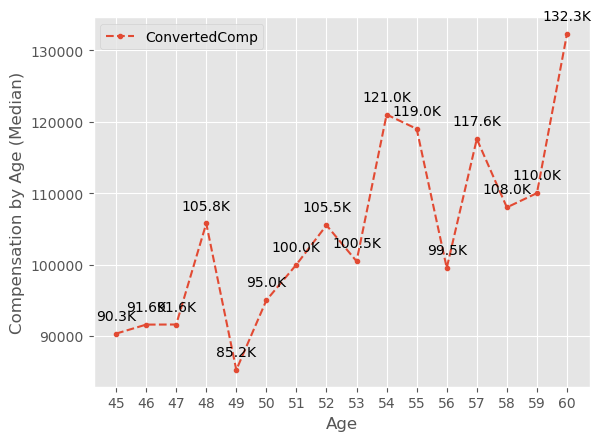

In [30]:
# your code goes here

line_plot.plot(kind='line', x='Age', y='ConvertedComp', marker='.', linestyle='--')
plt.xticks(np.arange(45, 61,1))
plt.ylabel('Compensation by Age (Median)')

for age, comp in zip(line_plot['Age'], line_plot['ConvertedComp']):
    plt.annotate(f"{comp/1000:.1f}K", 
                 (age, comp), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [31]:
QUERY="""
SELECT MainBranch FROM
master """

bar_q = pd.read_sql_query(QUERY, conn)

In [32]:
bar_plot = bar_q.value_counts().reset_index()

In [33]:
bar_plot.rename(columns={0: 'Count'}, inplace=True)
bar_plot

,MainBranch,Count
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


<AxesSubplot:>

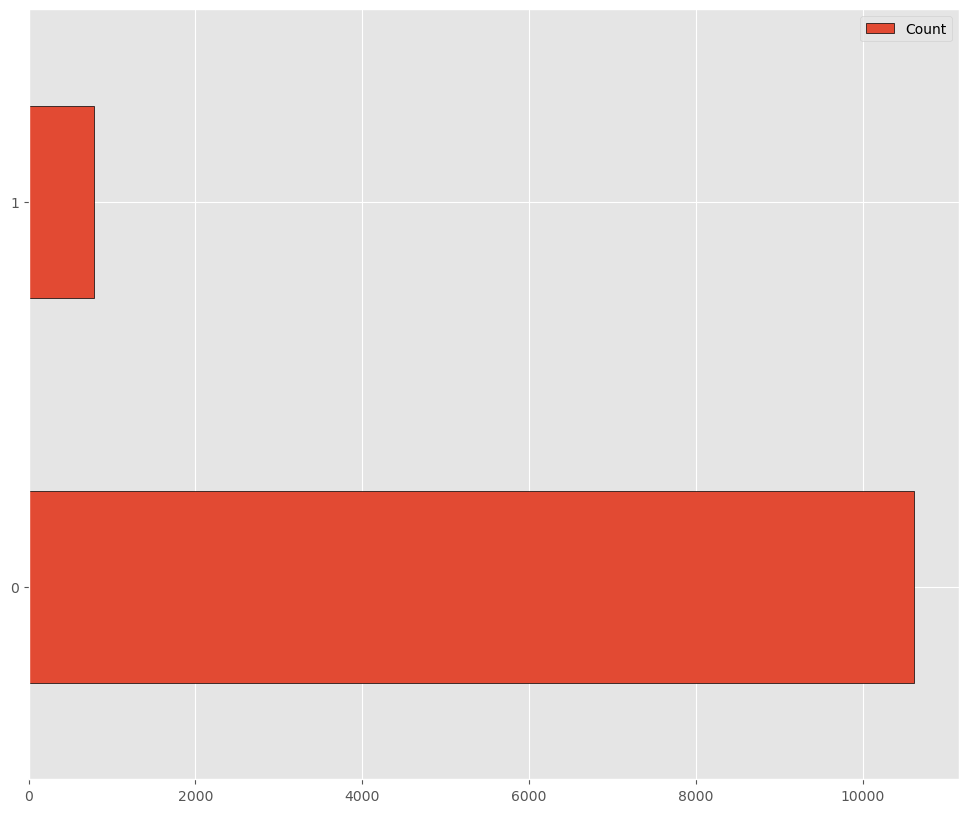

In [34]:
# your code goes here
bar_plot.plot(kind='barh', figsize=(12,10), edgecolor='black')

Close the database connection.


In [41]:
QUERY="""
SELECT G.Respondent, G.Gender, 
       (SELECT M.EdLevel FROM master M WHERE M.Respondent = G.Respondent) AS EdLevel, COUNT(Respondent)
FROM Gender AS G
WHERE G.Respondent IN (SELECT Respondent FROM master)
GROUP BY Gender, EdLevel
"""
dev_t1 = pd.read_sql_query(QUERY, conn)
dev_t1

,Respondent,Gender,EdLevel,COUNT(Respondent)
0,54,Man,None,100
1,25,Man,Associate degree,358
2,4,Man,"Bachelor’s degree (BA, BS, B.Eng., etc.)",5363
3,234,Man,I never completed any formal education,26
4,13,Man,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",2490
5,129,Man,"Other doctoral degree (Ph.D, Ed.D., etc.)",241
6,24,Man,Primary/elementary school,26
7,402,Man,"Professional degree (JD, MD, etc.)",145
8,53,Man,"Secondary school (e.g. American high school, G...",483
9,9,Man,Some college/university study without earning ...,1285


In [40]:
genderF = dev_t1.groupby(['Gender', 'EdLevel'], as_index=False).count()
genderF

,Gender,EdLevel,Respondent
0,Man,Associate degree,358
1,Man,"Bachelor’s degree (BA, BS, B.Eng., etc.)",5363
2,Man,I never completed any formal education,26
3,Man,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",2490
4,Man,"Other doctoral degree (Ph.D, Ed.D., etc.)",241
5,Man,Primary/elementary school,26
6,Man,"Professional degree (JD, MD, etc.)",145
7,Man,"Secondary school (e.g. American high school, G...",483
8,Man,Some college/university study without earning ...,1285
9,"Non-binary, genderqueer, or gender non-conforming",Associate degree,2


In [38]:
QUERY="""
SELECT YearsCodePro AS WorkExperience, COUNT(YearsCodePro) AS NumberOfRespondent FROM 
master
GROUP BY YearsCodePro
HAVING YearsCodePro <> 'None'
ORDER BY YearsCodePro
"""
dev_work = pd.read_sql_query(QUERY, conn)
dev_work.head()

,WorkExperience,NumberOfRespondent
0,1,670
1,10,667
2,11,291
3,12,337
4,13,226


In [108]:
dev_work.to_csv('WorkExperience.csv', index=False)

In [42]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
